In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
result = np.load('../bayes_implicit_solvent/continuous_parameter_experiments/freesolv_langevin_jax.npz')

In [12]:
traj = result['traj']

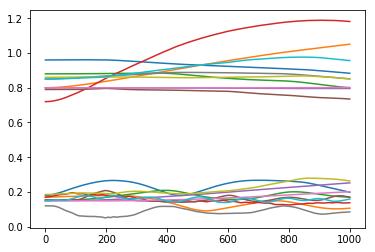

In [13]:
plt.plot(traj);

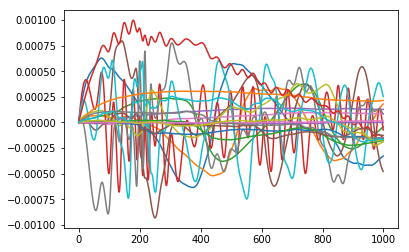

In [14]:
plt.plot(np.diff(traj, axis=0));

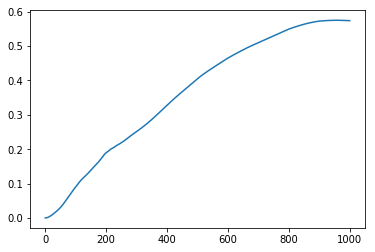

In [6]:
plt.plot(np.linalg.norm(traj - traj[0], axis=1))

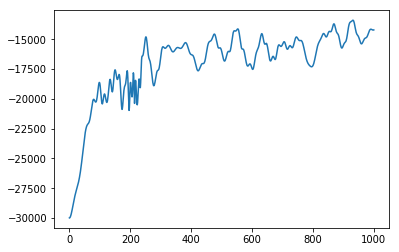

In [7]:
log_probs = result['log_prob_traj']
plt.plot(log_probs)

In [8]:
from bayes_implicit_solvent.continuous_parameter_experiments.elemental_types_mala_jax2 import get_predictions

number of molecules being considered: 321
first few CIDs ['mobley_3187514', 'mobley_900088', 'mobley_766666', 'mobley_5056289', 'mobley_4630641']


/Users/joshuafass/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:167: UserWarning: No GPU found, falling back to CPU.
  warnings.warn('No GPU found, falling back to CPU.')


discarding c1c(=O)[nH]c(=O)[nH]c1Cl (mobley_4338603) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)Cl (mobley_9557440) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl (mobley_2523689) because its free energy was outside of the range [-15, +5] kcal/mol
discarding C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O)O)O)O)O (mobley_9534740) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)F (mobley_337666) because its free energy was outside of the range [-15, +5] kcal/mol
discarding c1c(c(=O)[nH]c(=O)[nH]1)I (mobley_2727678) because its free energy was outside of the range [-15, +5] kcal/mol


In [9]:
from tqdm import tqdm
prediction_traj = np.array([get_predictions(snapshot) for snapshot in tqdm(traj)])

100%|██████████| 1001/1001 [08:50<00:00,  1.72it/s]


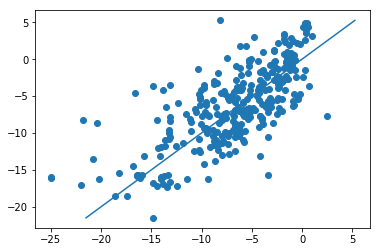

In [14]:
expt_means = result['expt_means']
diag = np.linspace(min(expt_means), max(expt_means))
plt.scatter(prediction_traj[-1], expt_means)
plt.plot(diag, diag)

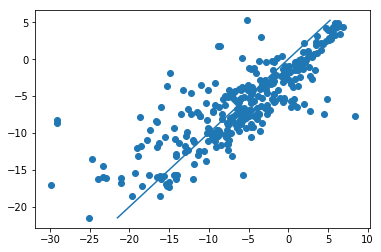

In [15]:
plt.scatter(prediction_traj[0], expt_means)
plt.plot(diag, diag)

In [12]:
len(expt_means)

65

In [16]:
from simtk import unit
from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

def rmse_in_kcal_mol(x, y):
    x_, y_ = unreduce(x), unreduce(y)
    squared_errors = (x_ - y_)**2
    mean_squared_errors = np.mean(squared_errors)
    root_mean_squared_errors = np.sqrt(mean_squared_errors)
    return root_mean_squared_errors

In [17]:
rmses = np.array([rmse_in_kcal_mol(snapshot, expt_means) for snapshot in prediction_traj])

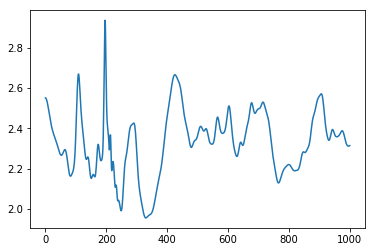

In [18]:
plt.plot(rmses)